In [1]:
import cv2,os

data_path='/content/drive/MyDrive/data'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'without_mask': 0, 'with_mask': 1}
['without_mask', 'with_mask']
[0, 1]


In [2]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 50x50, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [5]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

In [6]:
np.save('data',data)
np.save('target',new_target)

In [7]:
data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
31/31 [==============================] - 80s 3s/step - loss: 0.7603 - accuracy: 0.5631 - val_loss: 0.6164 - val_accuracy: 0.6179
Epoch 2/20
31/31 [==============================] - 79s 3s/step - loss: 0.5850 - accuracy: 0.6843 - val_loss: 0.4617 - val_accuracy: 0.8333
Epoch 3/20
31/31 [==============================] - 80s 3s/step - loss: 0.3929 - accuracy: 0.8310 - val_loss: 0.3265 - val_accuracy: 0.8740
Epoch 4/20
31/31 [==============================] - 79s 3s/step - loss: 0.3130 - accuracy: 0.8747 - val_loss: 0.2967 - val_accuracy: 0.8699
Epoch 5/20
31/31 [==============================] - 78s 3s/step - loss: 0.2470 - accuracy: 0.9002 - val_loss: 0.2010 - val_accuracy: 0.9187
Epoch 6/20
31/31 [==============================] - 82s 3s/step - loss: 0.1874 - accuracy: 0.9267 - val_loss: 0.1700 - val_accuracy: 0.9350
Epoch 7/20
31/31 [==============================] - 79s 3s/step - loss: 0.1429 - accuracy: 0.9450 - val_loss: 0.1390 - val_accuracy: 0.9390
Epoch 8/20
31/31 [==

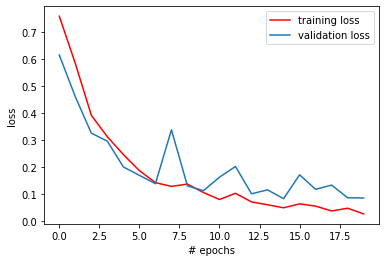

In [10]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

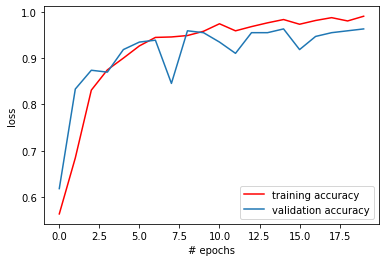

In [11]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [12]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 3s 523ms/step - loss: 0.2749 - accuracy: 0.9197
[0.2748984396457672, 0.9197080135345459]
